In [1]:
from embeddings import EmbeddingGenerator
import helpers
import pandas as pd
import numpy as np
#tweet dataset: https://www.kaggle.com/datasets/kazanova/sentiment140/discussion/454347


2024-02-07 00:10:39.785297: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-07 00:10:39.808935: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 00:10:39.808960: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 00:10:39.808974: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 00:10:39.814494: I tensorflow/core/platform/cpu_feature_g

In [2]:
gen = EmbeddingGenerator(only_bert=False,cached_embedding_path = '../../data/concept_net/cached_embeddings')

2024-02-07 00:10:40.938845: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-07 00:10:40.941686: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-07 00:10:40.941716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-07 00:10:40.943232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-07 00:10:40.943254: I tensorflow/compile

In [3]:
big_df = helpers.pre_process_input_data(filepath='../../data/concept_net/tweets.csv',num_samples=500)


array([[<Axes: title={'center': 'target'}>]], dtype=object)

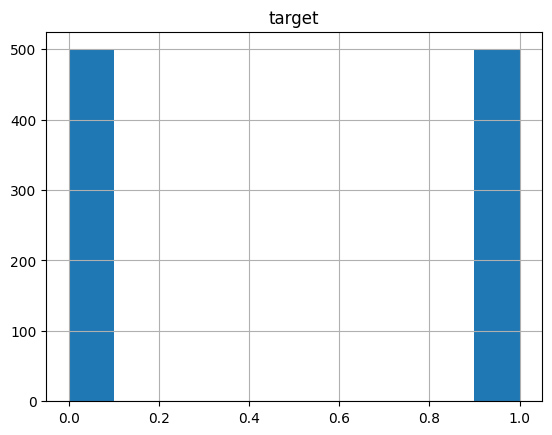

In [4]:
big_df.hist()


# How to generate different embeddings to pass to classifiers

## Glove for Sentences

In [5]:
train_features,test_features,val_features,train_labels,test_labels,val_labels,train_text,test_text,val_text = gen.get_train_test_val_with_other_embedding_multi_word(big_df,test_size=0.2)
print(f"""
Train Vector Shape: {train_features.shape}
Validation Vector Shape: {val_features.shape}
Test Vector Shape: {test_features.shape}
"""
     )

Converting multi word text into Other Embedding (Glove by default)


  0%|          | 0/1000 [00:00<?, ?it/s]

Removing 5 entries that did not exist in embeddings
Max feature vec size: 9300

Train Vector Shape: (636, 300)
Validation Vector Shape: (160, 300)
Test Vector Shape: (199, 300)



## Glove for Single Words

In [6]:
word_df = big_df.copy()
word_df['text'] = [v.split(' ')[-1] for v in word_df['text']] # Arbitrarily grab only last word of tweet because I dont want to make another dataset rn
train_features,test_features,val_features,train_labels,test_labels,val_labels,train_text,test_text,val_text = gen.get_train_test_val_with_other_embedding_single_word(word_df,test_size=0.2)

print(f"""
Train Vector Shape: {train_features.shape}
Validation Vector Shape: {val_features.shape}
Test Vector Shape: {test_features.shape}
"""
     )

  0%|          | 0/1000 [00:00<?, ?it/s]

Removing 855 words that did not exist in embeddings

Train Vector Shape: (92, 300)
Validation Vector Shape: (24, 300)
Test Vector Shape: (29, 300)



## Bert embeddings for Sentences OR single words (same function)

In [7]:
train_features,test_features,val_features,train_labels,test_labels,val_labels,train_text,test_text,val_text = gen.get_train_test_val_with_bert(big_df,test_size=0.2)
print(f"""
Train Vector Shape: {train_features.shape}
Validation Vector Shape: {val_features.shape}
Test Vector Shape: {test_features.shape}
"""
     )

Grabbing BERT Embeddings with padding to 151 characters


  0%|          | 0/2 [00:00<?, ?it/s]

2024-02-07 00:12:27.141669: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory



Train Vector Shape: (640, 300)
Validation Vector Shape: (160, 300)
Test Vector Shape: (200, 300)

